# PyGEM Advanced Test - Dynamical Spinup

Brandon Tober, David Rounce<br>
Carnegie Mellon University<br>
Created: 04OCT2025<br> <br>
Objective: build on the [*advanced_test.ipynb*](https://github.com/PyGEM-Community/PyGEM-notebooks/blob/main/advanced_test.ipynb) demonstration and goes running dynamical spinup followed by calibration and simulation.  over running calibration and simulations following dynamical spinup. If you have yet to do so, we suggest going through the advanced test notebook in full before proceeding.<br>

This demonstration utilizes PyGEM's *sample_data* for Khumbu Glacier (RGI60-15.03733), which should have been downloaded during model installation and setup (see [here](https://pygem.readthedocs.io/en/latest/install_pygem.html)), but can also be downloaded directly [here](https://drive.google.com/file/d/1Wu4ZqpOKxnc4EYhcRHQbwGq95FoOxMfZ/view?usp=drive_link).<br>

Tasks:
1a. Run inversion (optional)
1b. Run dynamical spinup
2. Run calibration
3. Run simulations

> **📝 Note:**<br>
> In this notebook, any PyGEM Python scripts that are called will be preceeded by ```!```. In Jupyter Notebook, the ```!``` character is used to execute shell commands directly from a notebook cell. When you prefix a command with ```!```, Jupyter sends it to the system's command-line shell for execution, instead of interpreting it as Python code. Command-line arguments are also bracketed (e.g., ```{arg}```), when passing Python variables to a command-line shell from within a Jupyter Notebook. If executing a given PyGEM script directly from one's terminal, remove the ```!``` character and brackets ```{}``` around arguments.
>

> **⚠️ Warning:**<br>
> Ensure that the `root` parameter in PyGEM configuration file points to the correct path for the sample dataset (should end in */sample_data/*, not */sample_data_tw/*):<br>

In [1]:
%%bash
grep 'root:' ~/PyGEM/config.yaml

root: /Users/btober/PyGEM/sample_data/sample_data # note, this parameter must be modfied as to point to the appropriate location. all other paths are assumed relative to this (inputs and outputs).


If the incorrect path is set, you may manually modify with the text editor of your choice so that the `root` parameter is set to point to wherever the appropriate sample dataset is located on your computer.<br>

In [2]:
### imports ###
import os, sys, glob, json
from oggm import cfg, tasks, workflow
from IPython.display import Image, display
# pygem imports
from pygem.setup.config import ConfigManager
# instantiate ConfigManager
config_manager = ConfigManager()
# read the config
pygem_prms = config_manager.read_config()   # NOTE: ensure that your root path in ~/PyGEM/config.yaml points to
                                            # the appropriate location. If any errors occur, check this first.
rootpath=pygem_prms['root']

## Dynamical Spinup

We'll run dynamical spinup, seeking to match the glacier area given by the Randolph Glacier Inventory.<br>
What are the options of PyGEM's *run_spinup* script?

In [3]:
!run_spinup -h

usage: run_spinup [-h] [-rgi_region01 RGI_REGION01 [RGI_REGION01 ...]]
                  [-rgi_region02 RGI_REGION02 [RGI_REGION02 ...]]
                  [-rgi_glac_number RGI_GLAC_NUMBER [RGI_GLAC_NUMBER ...]]
                  [-rgi_glac_number_fn RGI_GLAC_NUMBER_FN]
                  [-spinup_period SPINUP_PERIOD] [-target_yr TARGET_YR]
                  [-ye YE] [-ncores NCORES]
                  [-mb_model_params {regional_priors,emulator}]

perform dynamical spinup

options:
  -h, --help            show this help message and exit
  -rgi_region01 RGI_REGION01 [RGI_REGION01 ...]
                        Randoph Glacier Inventory region (can take multiple,
                        e.g. `-run_region01 1 2 3`)
  -rgi_region02 RGI_REGION02 [RGI_REGION02 ...]
                        Randoph Glacier Inventory subregion (either `all` or
                        multiple spaced integers, e.g. `-run_region02 1 2 3`)
  -rgi_glac_number RGI_GLAC_NUMBER [RGI_GLAC_NUMBER ...]
                    

The following parameters should either be set within your configuration file, or passed to the *run_spinup* script as command line arguments:
<pre>
glac_no =             15.03733
</pre>

In [20]:
# passing the above parameters as command line arguments:
glac_no = 15.03733
!run_inversion -rgi_glac_number {glac_no} -calibrate_regional_glen_a False

2025-10-06 20:53:37: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-10-06 20:53:37: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-10-06 20:53:37: oggm.cfg: Multiprocessing: using all available processors (N=10)
1 glaciers in region 15 are included in this model run: ['03733']
This study is focusing on 1 glaciers in region [15]
2025-10-06 20:53:37: oggm.workflow: Execute entity tasks [GlacierDirectory] on 1 glaciers
2025-10-06 20:53:37: oggm.workflow: Execute entity tasks [process_climate_data] on 1 glaciers
2025-10-06 20:53:37: oggm.core.climate: (RGI60-15.03733) process_climate_data
2025-10-06 20:53:37: oggm.shop.w5e5: (RGI60-15.03733) process_gswp3_w5e5_data
2025-10-06 20:53:37: oggm.workflow: Execute entity tasks [mb_df_to_gdir] on 1 glaciers
2025-10-06 20:53:37: pygem.shop.mbdata: (RGI60-15.03733) mb_df_to_gdir
2025-10-06 20:53:37: oggm.workflow: Execute entity tasks [debris_to_gdir] on 1 glaciers
2025-10-06 2

In [21]:
!run_calibration -rgi_glac_number {glac_no} -option_calibration emulator

Processing: ERA5
1 glaciers in region 15 are included in this model run: ['03733']
This study is focusing on 1 glaciers in region [15]
ERA5 : RGI60-15.03733
2025-10-06 20:53:43: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-10-06 20:53:43: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-10-06 20:53:43: oggm.cfg: Multiprocessing: using all available processors (N=10)
2025-10-06 20:53:43: oggm.cfg: PARAMS['continue_on_error'] changed from `False` to `True`.
2025-10-06 20:53:43: oggm.cfg: PARAMS['dl_verify'] changed from `False` to `True`.
2025-10-06 20:53:43: oggm.cfg: PARAMS['use_multiple_flowlines'] changed from `True` to `False`.
2025-10-06 20:53:43: oggm.workflow: Execute entity tasks [GlacierDirectory] on 1 glaciers
2025-10-06 20:53:43: oggm.workflow: Execute entity tasks [consensus_gridded] on 1 glaciers
Total processing time: 5.589684009552002 s


In [7]:
!run_calibration -h

usage: run_calibration [-h] [-rgi_region01 RGI_REGION01 [RGI_REGION01 ...]]
                       [-rgi_region02 RGI_REGION02 [RGI_REGION02 ...]]
                       [-ref_climate_name REF_CLIMATE_NAME]
                       [-ref_startyear REF_STARTYEAR]
                       [-ref_endyear REF_ENDYEAR]
                       [-rgi_glac_number_fn RGI_GLAC_NUMBER_FN]
                       [-rgi_glac_number RGI_GLAC_NUMBER [RGI_GLAC_NUMBER ...]]
                       [-ncores NCORES]
                       [-option_calibration OPTION_CALIBRATION]
                       [-nchains NCHAINS] [-chain_length CHAIN_LENGTH]
                       [-burn_pct BURN_PCT] [-option_ordered] [-spinup] [-p]
                       [-v]

Run PyGEM calibration

options:
  -h, --help            show this help message and exit
  -rgi_region01 RGI_REGION01 [RGI_REGION01 ...]
                        Randoph Glacier Inventory region (can take multiple,
                        e.g. `-run_region01 1 2 3`)

If successful, the script will run without errors and the following datasets will be generated:

* *~/sample_data/Output/calibration/15/15.03733-modelprms_dict.json*<br>
* *~/sample_data/emulator/sims/15/15.03733-100_emulator_sims.csv*<br>
* *~/sample_data/emulator/models/15/15.03733-emulator-mb_mwea.pth*<br>
* *~/sample_data/emulator/models/15/15.03733-emulator-mb_mwea_extra.pkl*<br>

These contain the calibration data, simulations used to create the emulator, and information needed to recreate the emulator.

>**Note:** Normally the next step would be to run this for all glaciers in a region and then determine the prior distributions for the MCMC methods; however, given we’re just testing on a single glacier, skip this step and use the default priors from the *~/sample_data/Output/calibration/priors_region.csv*.

If the emulator calibration completed successfully, we can proceed with Bayesian inference model calibration. The following parameters should either be set within your configuration file, or passed to the *run_calibration* script as command line arguments:
<pre>
glac_no =             15.03733
ref_startyear =       2000
ref_endyear =         2019
option_calibration =  MCMC
</pre>

In [8]:
# passing the above parameters as command line arguments:
glac_no = 15.03733
!run_calibration -rgi_glac_number {glac_no} -ref_startyear 2000 -ref_endyear 2019 -option_calibration MCMC -v  -p # `-v` == vervose (will generate some diagnostic plots) and `-p` == progress bar

Processing: ERA5
1 glaciers in region 15 are included in this model run: ['03733']
This study is focusing on 1 glaciers in region [15]
ERA5 : RGI60-15.03733
2025-10-06 20:45:22: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-10-06 20:45:22: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-10-06 20:45:22: oggm.cfg: Multiprocessing: using all available processors (N=10)
2025-10-06 20:45:22: oggm.cfg: PARAMS['continue_on_error'] changed from `False` to `True`.
2025-10-06 20:45:22: oggm.cfg: PARAMS['dl_verify'] changed from `False` to `True`.
2025-10-06 20:45:22: oggm.cfg: PARAMS['use_multiple_flowlines'] changed from `True` to `False`.
2025-10-06 20:45:22: oggm.workflow: Execute entity tasks [GlacierDirectory] on 1 glaciers
2025-10-06 20:45:22: oggm.workflow: Execute entity tasks [consensus_gridded] on 1 glaciers
  mb_data (mwea): -0.45 +/- 0.11
15.03733 chain 0 initials:	tbias: 0.78, kp: 0.91, ddfsnow: 0.0041
20010it [

Open a couple diagnostic plots. These plots are simply intended to serve as diagnostics of the performance of Bayesian inference calibration.<br><br>

The first plot shows the accepted (orange) and proposed (blue) steps across the MCMC sampling chain for each of PyGEM's three model parameters (temperature bias, precipitation factor, and the degree-day factor of snow, respectively for the top three panels). The fourth panel down shows the modeled mass balance across the chain compared to geodetic observations (with 1- and 2$\sigma$ uncertainty shown by the shaded region). The final panel shows the acceptance rate across the chain (accepted v. proposed samples).<br><br>
For further analysis of MCMC calibration, see the [*analyze_mcmc.ipynb*](https://github.com/PyGEM-Community/PyGEM-notebooks/blob/main/analyze_mcmc.ipynb) notebook.

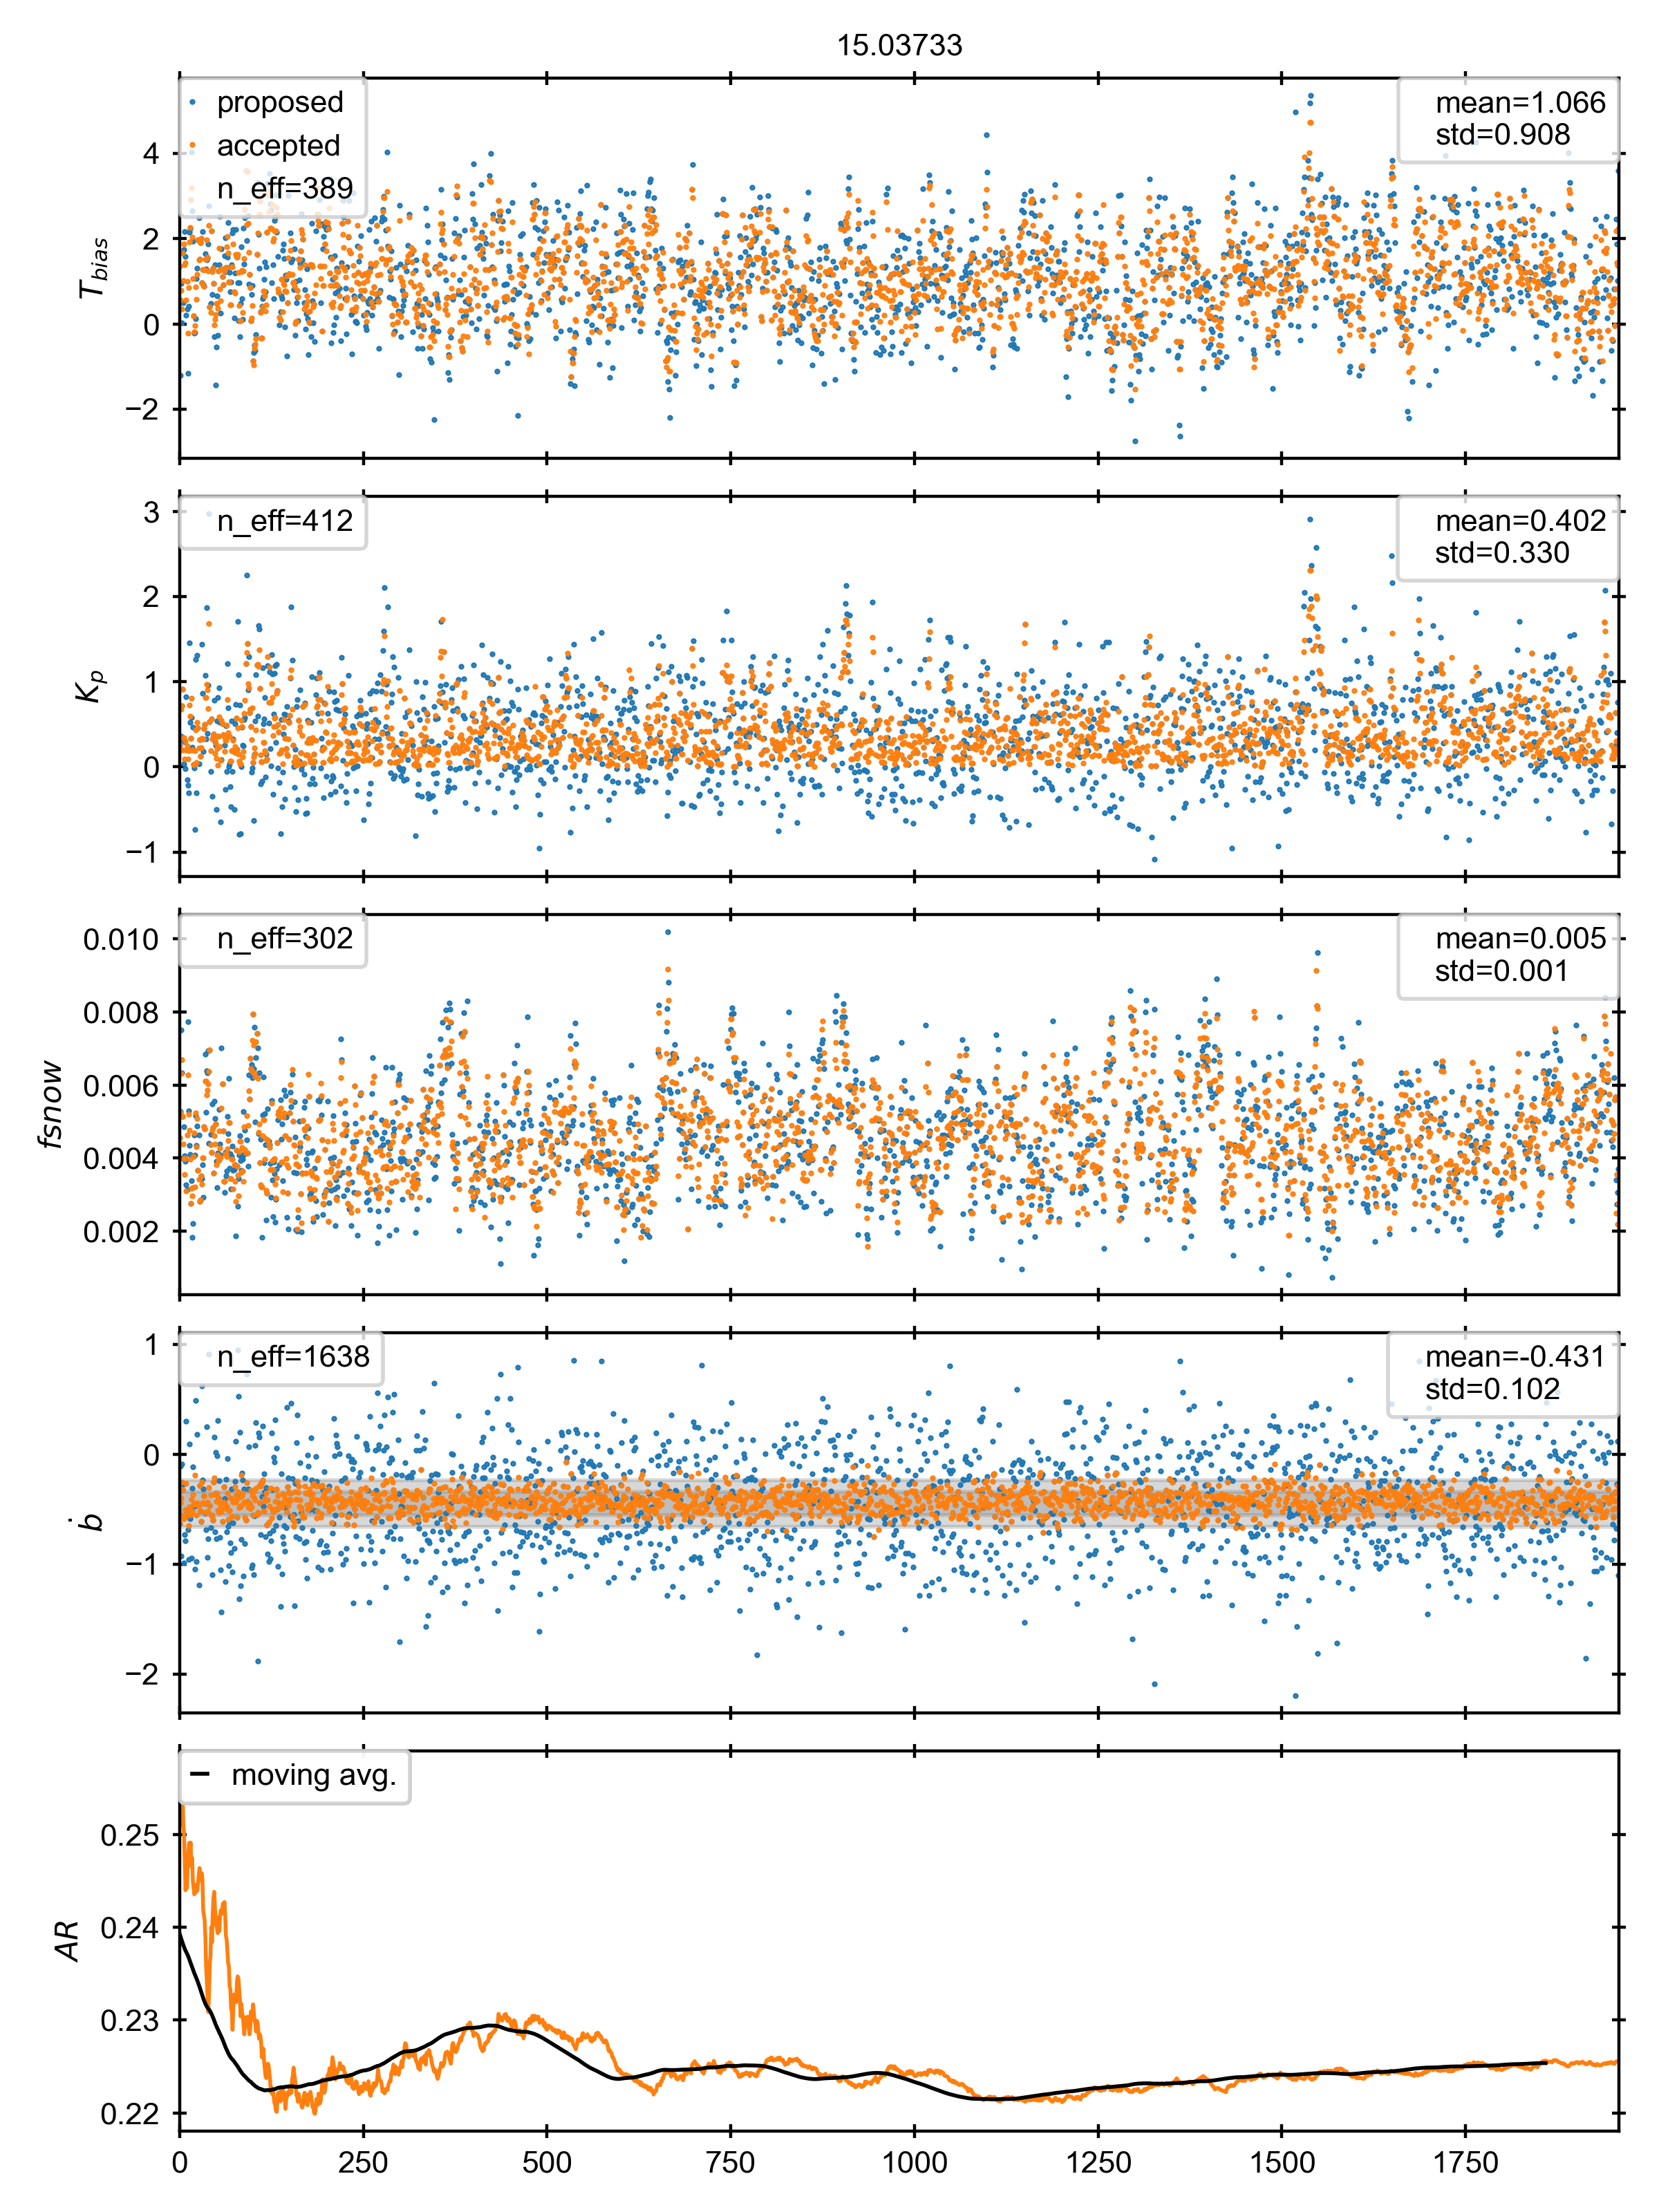

In [9]:
reg = str(glac_no).split('.')[0].zfill(2)
display(Image(filename=f'{rootpath}/Output/calibration/{reg}/fig/{glac_no}-chain0.png', width=500, height=300))

The next plot shows a histogram of the residual mass balance (modeled *minus* observed).

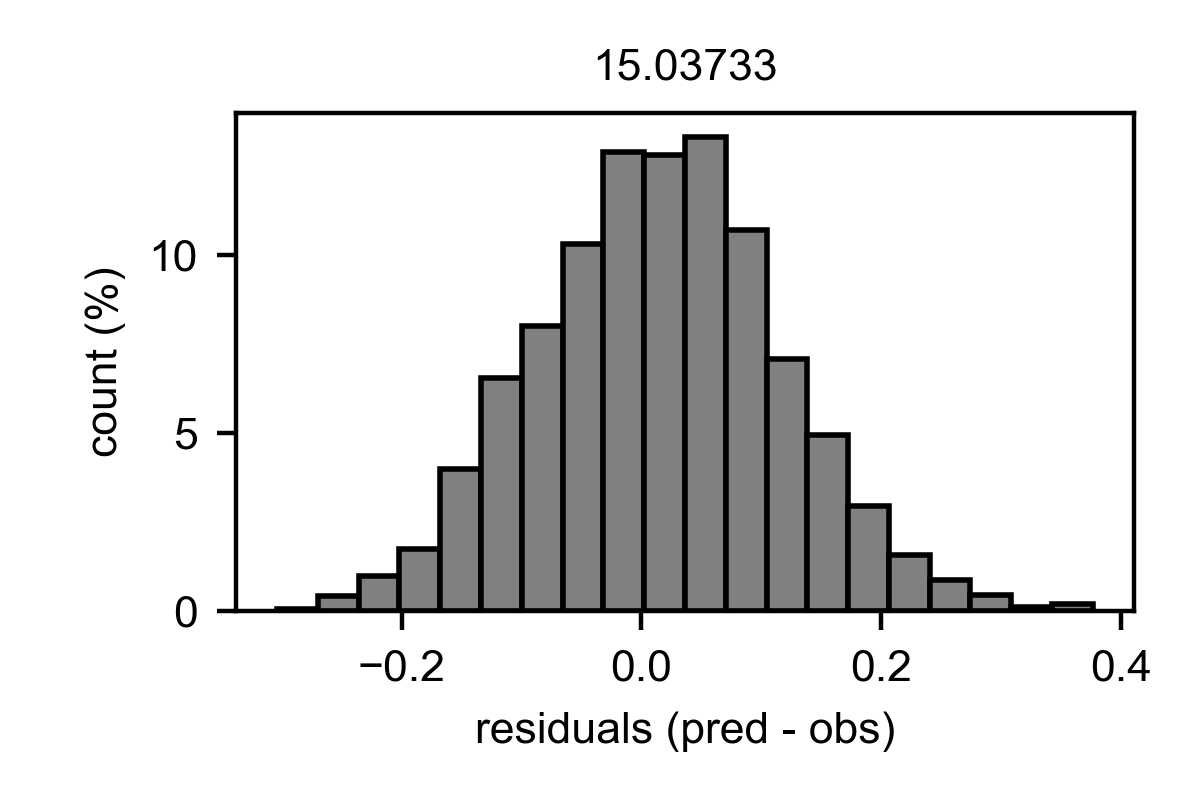

In [10]:
display(Image(filename=f'{rootpath}/Output/calibration/{reg}/fig/{glac_no}-chain0-residuals-0.png', width=300, height=300))

## MCMC simulations

You are now ready to run an MCMC simulation. We’ll skip the simulation for the reference period and go directly to running a future simulation. The following parameters should either be set within your configuration file, or passed to the *run_simulation* script as command line arguments:
<pre>
glac_no =               15.03733
sim_climate_name =      CESM2
sim_climate_scenario =  ssp245
sim_startyear =         2000
sim_endyear =           2100
option_calibration =    MCMC
nsims =                 50
option_dynamics =       OGGM
use_reg_glena =         False         
</pre>


In [24]:
# passing the above parameters as command line arguments:
gcm_name = 'CESM2'
scenario = 'ssp245'
!run_simulation -rgi_glac_number {glac_no} -sim_climate_name {gcm_name} -sim_climate_scenario {scenario} -sim_startyear 2000 -sim_endyear 2100 -option_calibration MCMC -nsims 50 -option_dynamics OGGM -use_reg_glena False

2025-10-06 22:33:48: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-10-06 22:33:48: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-10-06 22:33:48: oggm.cfg: Multiprocessing: using all available processors (N=10)
2025-10-06 22:33:48: oggm.cfg: PARAMS['hydro_month_nh'] changed from `10` to `1`.
2025-10-06 22:33:48: oggm.cfg: PARAMS['hydro_month_sh'] changed from `4` to `1`.
2025-10-06 22:33:48: oggm.cfg: PARAMS['trapezoid_lambdas'] changed from `2.0` to `1`.
usage: run_simulation [-h] [-rgi_region01 RGI_REGION01 [RGI_REGION01 ...]]
                      [-rgi_region02 RGI_REGION02 [RGI_REGION02 ...]]
                      [-rgi_glac_number RGI_GLAC_NUMBER [RGI_GLAC_NUMBER ...]]
                      [-ref_climate_name REF_CLIMATE_NAME]
                      [-ref_startyear REF_STARTYEAR]
                      [-ref_endyear REF_ENDYEAR]
                      [-rgi_glac_number_fn RGI_GLAC_NUMBER_FN]
                   

If successful, we should see the following simulation dataset:

In [12]:
%%bash -s "$rootpath" "$reg" "$gcm_name" "$scenario"
ls -lah $1/Output/simulations/$2/$3/$4/stats/*50sets*.nc

ls: /Users/btober/PyGEM/sample_data/sample_data/Output/simulations/15/CESM2/ssp245/stats/*50sets*.nc: No such file or directory


CalledProcessError: Command 'b'ls -lah $1/Output/simulations/$2/$3/$4/stats/*50sets*.nc\n'' returned non-zero exit status 1.

## Plot

Visualize the model output. First use xarray to load the netcdf file shown above.

In [ ]:
import xarray as xr
ds = xr.open_dataset(glob.glob(f'{rootpath}/Output/simulations/{reg}/{gcm_name}/{scenario}/stats/{glac_no}_{gcm_name}_{scenario}_MCMC_*50sets*_2000_2100_all.nc*')[0])
ds

We can see the model output dataset above. Note, the default model output for `>1` simulation is to store the median and the median absolute deviation across all simulations (see [here](https://pygem.readthedocs.io/en/latest/model_output.html)). We'll plot the median and median absolute deviation across all 50 simulations for the glacier runoff, mass, and area, but feel free to experiment with other variables and analyses.

In [ ]:
# pull monthly runoff and resample to annual values - do this for median and median abs. deviation
ks = ['glac_runoff_monthly', 'glac_runoff_monthly_mad']
runoff = []
for k in ks:
    # runoff is monthly, so sum to yealy vals
    ds_sum = ds[k][0].resample(time='YE').sum('time')
    # append annual runoff to list
    runoff.append(ds_sum.values)

# pull annual area - do this for median and median abs. deviation
ks = ['glac_area_annual', 'glac_area_annual_mad']
area = []
for k in ks:
    # note, PyGEM annual area is the area at the beginning of each model year
    # to align with plotting the total runoff from each year, we'll take index [1:],
    # inidicating we're analyzing values for the end of each model year
    area.append(ds[k][0].values[1:])


# pull annual mass - do this for median and median abs. deviation
ks = ['glac_mass_annual', 'glac_mass_annual_mad']
mass = []
for k in ks:
    # note, PyGEM annual mass is the mass at the beginning of each model year
    # to align with plotting the total runoff from each year, we'll take index [1:],
    # inidicating we're analyzing values for the end of each model year
    mass.append(ds[k][0].values[1:])

# get model years - note indexing [:-1]
# for a simulation that ran from 2000 thru 2100
year = (ds.year.values[:-1:])

In [ ]:
# create 3 x 1 plot with runoff, area, mass
import matplotlib.pyplot as plt
# initialize figure
fig,ax = plt.subplots(3,figsize=(4,7),sharex=True)
ax[0].plot(year,runoff[0]/runoff[0][0], label='Median')
ax[0].fill_between(year,
                    (runoff[0] - runoff[1]) / runoff[0][0],
                    (runoff[0] + runoff[1]) / runoff[0][0],
                    alpha=.5,
                    label='MAD')

ax[1].plot(year,area[0]/area[0][0])
ax[1].fill_between(year,
                    (area[0] - area[1]) / area[0][0],
                    (area[0] + area[1]) / area[0][0],
                    alpha=.5)

ax[2].plot(year,mass[0]/mass[0][0])
ax[2].fill_between(year,
                    (mass[0] - mass[1]) / mass[0][0],
                    (mass[0] + mass[1]) / mass[0][0],
                    alpha=.5)

# create legend
leg = ax[0].legend(fancybox=False,borderaxespad=0,handlelength=1,loc='upper right')
# increase linewidths in legend

for line in leg.get_lines():
    line.set_linewidth(2)
    
# set x axis limits to temporal extent of our data
ax[0].set_xlim([2000,2100])
# create x and y axis labels
ax[0].text(-0.25, 0.5, 'normalized glacier runoff (-)', va='center', ha='center', rotation=90, transform=ax[0].transAxes)
ax[1].text(-0.25, 0.5, 'normalized glacier area (-)', va='center', ha='center', rotation=90, transform=ax[1].transAxes)
ax[2].text(-0.25, 0.5, 'normalized glacier mass (-)', va='center', ha='center', rotation=90, transform=ax[2].transAxes)
# title
ax[0].text(.5, 1.1, 'Khumbu Glacier CEMS2 SSP2-4.5', va='center', ha='center', rotation=0, transform=ax[0].transAxes)
fig.tight_layout()

## Next: try an even more advanced test (for a tide-water glacier)
See, the [*advanced_test_tw.ipynb*](https://github.com/PyGEM-Community/PyGEM-notebooks/blob/main/advanced_test_tw.ipynb) Jupyter Notebook.